## Homework 2: Trees and Calibration
### Instructions:
Please upload the .ipynb, .pdf to Github prior to the deadline. Please include your UNI as well.

Make sure to use the dataset that we provide in CourseWorks/Classroom.

There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).

## Name:  Apurva Patel

## UNI: amp2365

## The Dataset


### Description

The Diabetes Dataset comprises medical data from 768 female patients of Pima Indian heritage, including 8 health-related features and a binary target indicating the presence or absence of diabetes.


In [9]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion

## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [11]:
# url = 'https://raw.githubusercontent.com/Apurva3509/Applied-Machine-Learning/main/2/diabetes.csv?token=GHSAT0AAAAAACNAARHPWYJBTLOL4RDUZJJYZO2KQMQ'
# df1 = pd.read_csv(url)

In [12]:
df1 = pd.read_csv('/content/diabetes.csv')

In [13]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**1.2: How many instances are there in the dataset for each class (diabetic and non-diabetic patients)? What does this tell you about the balance of the dataset?**

In [14]:
df1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

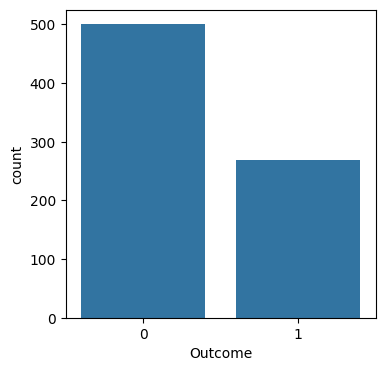

In [15]:
## YOUR CODE HERE
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
sns.countplot(x=df1.Outcome, data=df1)
plt.show()


- There are total 500 occurance of Non diabetic(0) patients and 268 for Diabetic(1).
- The data set is clearly imbalanced where the count of Non-diabetic patients is more thant hat of diabetic patients.

**1.3: Are there any missing values in the dataset? If so, how will you handle them?**

In [16]:
## YOUR CODE HERE
missing_values = df1.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


- No missing values

**1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

**Hint: Based on the distribution of the data, try to use the best splitting strategy.

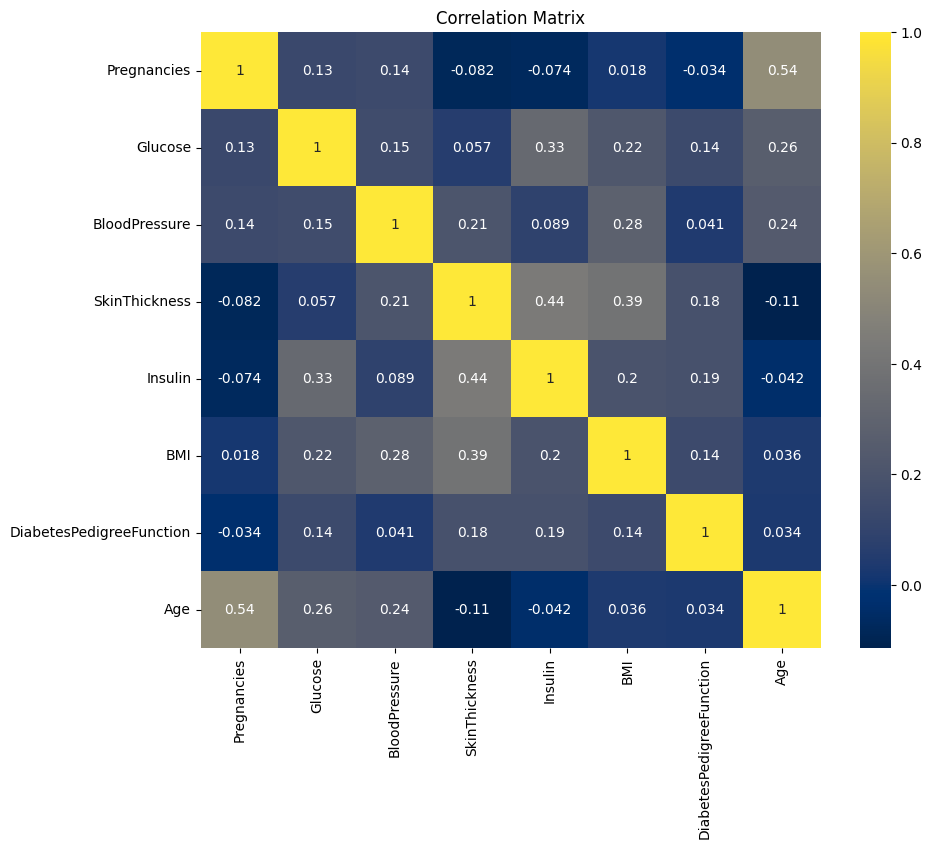

In [17]:
vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


corr2 = df1[vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr2, annot=True, cmap='cividis')
# sns.heatmap(corr2, annot=True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

In [18]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for column_name in columns:
    counts = df1[column_name].value_counts()
    # print(f"Unique values and their frequencies for column '{column_name}':")
    # print(counts)
    # print()

In [20]:
## YOUR CODE HERE
df1_X = df1.drop(columns=['Outcome'])
df1_y = df1['Outcome']

In [21]:
print('Shape of feature vectors: ', df1_X.shape)
print('Shape of target vector: ', df1_y.shape)

Shape of feature vectors:  (768, 8)
Shape of target vector:  (768,)


In [22]:
df1_y_array = df1_y.to_numpy()
df1_y = df1_y_array.reshape(-1, 1)

print(df1_y.shape)

(768, 1)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(df1_X, df1_y, test_size=0.2, random_state=42, stratify=df1_y)
# X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42, stratify=y_dev)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# print("Shape of y_train:", X_val.shape)
# print("Shape of y_train:", y_val.shape)

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (614, 8)
Shape of y_train: (614, 1)
Shape of X_test: (154, 8)
Shape of y_test: (154, 1)


**1.5: Build a decision tree classifier to predict the onset of diabetes. What criterion (e.g., Gini impurity, entropy) did you choose for splitting, and why?**

- I am using gini to split because I know that gini is a measure of absolute purity and splitting is made easy when directly compared with absolute values.

- Also as per their formula, entropy has a log function which can slow the process if we dont keep a max depth for the tree.

In [24]:
pipe_gini = DecisionTreeClassifier(max_depth=10, criterion='gini')
pipe_gini.fit(X_train, y_train)
print("Gini to split")
print("Accuracy Score on Train set: ", pipe_gini.score(X_train, y_train))
print("Accuracy Score on Test set: ", pipe_gini.score(X_test, y_test))

Gini to split
Accuracy Score on Train set:  0.9511400651465798
Accuracy Score on Test set:  0.7272727272727273


**1.6: Evaluate your model using accuracy, precision, recall, and F1-score. What do these metrics reveal about your model's performance?**

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
y_pred = pipe_gini.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 0.7272727272727273
Precision: 0.6428571428571429
Recall: 0.5
F1 score: 0.5625000000000001


1. Accuracy: The model has an accuracy of around 72.08%, meaning it correctly predicts the diabetes outcome for about 72.08% of the instances in the dataset.
2. Precision: Precision of approximately 62.8% indicates that when the model predicts a positive outcome (diabetes), it is correct around 62.8% of the time.
3. Recall: Recall of about 50% suggests that the model is able to correctly identify around 50% of the actual positive cases.
4. F1 Score: The F1 score, which considers both precision and recall, is approximately 55.6%. It provides a balance between precision and recall, giving an overall measure of the model's performance.
-
These metrics reveal that while the model has decent accuracy, its performance in terms of precision, recall, and F1 score is relatively modest. This could be due to the imbalance in the dataset, as indicated by the lower recall value compared to precision. Improving the model's ability to detect true positives (diabetes cases) while minimizing false positives and false negatives would be crucial for better performance, especially in medical diagnosis tasks like predicting diabetes. Further model tuning, feature engineering, or utilizing techniques to handle imbalanced datasets could potentially enhance the model's performance.

**1.8: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

In [27]:
from sklearn.pipeline import *
from sklearn.feature_selection import mutual_info_classif


In [28]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
feat_imp = pipe_gini.feature_importances_

print("Total features: ",len(features))
print("Weights for features: ", len(feat_imp))

Total features:  8
Weights for features:  8


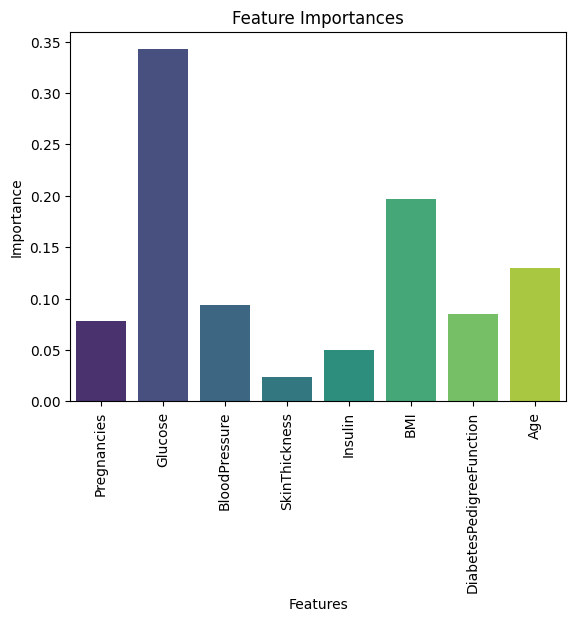

In [29]:
ax = sns.barplot(x=list(features), y=list(feat_imp), palette='viridis')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances')
ax.tick_params(axis='x', rotation=90)
plt.show()

In [30]:
imp_df = pd.DataFrame({'Features': features, 'Weights': feat_imp})
imp_sorted = imp_df.sort_values(by = ['Weights'], ascending = False)
imp_sorted

,Features,Weights
1,Glucose,0.342339
5,BMI,0.196474
7,Age,0.129601
2,BloodPressure,0.093884
6,DiabetesPedigreeFunction,0.085114
0,Pregnancies,0.078641
4,Insulin,0.050527
3,SkinThickness,0.023421


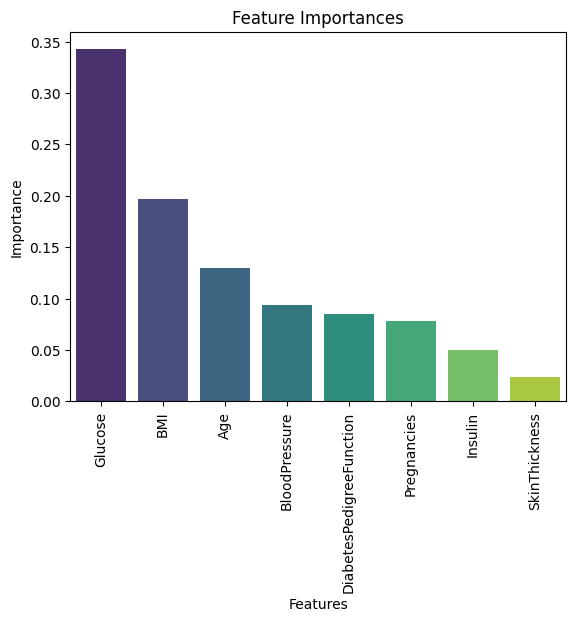

In [31]:
ax = sns.barplot(x='Features', y='Weights', data=imp_sorted, palette='viridis')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances')
ax.tick_params(axis='x', rotation=90)
plt.show()

The top 3 features are:
1. Glucose - It is directly proportionl to the amount of sugar level in body and has the highest weight.
2. BMI - It is also relted to diabetes and has a positive influence on making a porediction for diabetes.
3. Age - With increase in age we observe a higher chance of having diabetes.

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset**

In [32]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [33]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [34]:
## YOUR CODE HERE
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
print(f"Random Forest accuracy score: ", rf_model.score(X_test, y_test))

Random Forest accuracy score:  0.7402597402597403


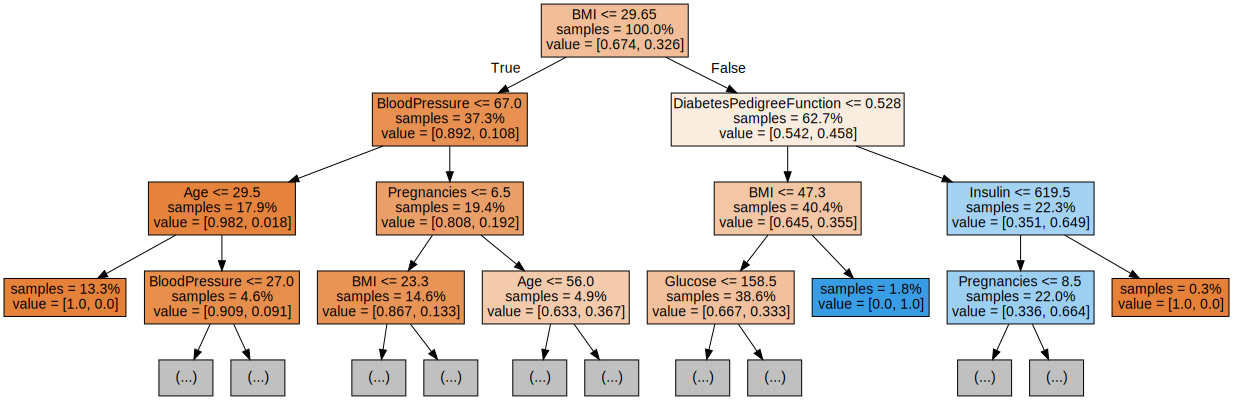

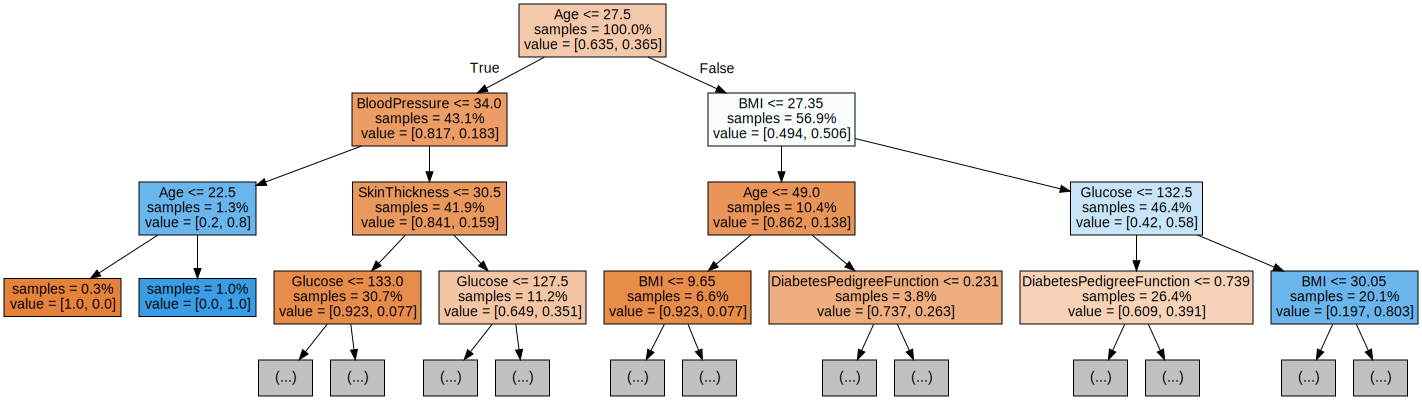

In [35]:
# Displaying first 2 trees in the forest
for i in range(2):
    tree = rf_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=3,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [36]:
feature_imp = pd.Series(rf_model.feature_importances_).sort_values(ascending = False)
feature_imp

1    0.267179
5    0.152435
7    0.136758
6    0.123744
2    0.090866
0    0.086395
4    0.073021
3    0.069603
dtype: float64

**2.2 Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [37]:
## YOUR CODE HERE: I can check if the impurity is 0 for all decision tree and then if 0 then pure leaves
for i, tree in enumerate(rf_model.estimators_):
    all_pure = all(impurity == 0 for impurity in tree.tree_.impurity)
    if all_pure:
        print(f"Tree {i + 1}: All leaves are pure")
    else:
        print(f"T {i + 1}: No pure leaves")

T 1: No pure leaves
T 2: No pure leaves
T 3: No pure leaves
T 4: No pure leaves
T 5: No pure leaves
T 6: No pure leaves
T 7: No pure leaves
T 8: No pure leaves
T 9: No pure leaves
T 10: No pure leaves
T 11: No pure leaves
T 12: No pure leaves
T 13: No pure leaves
T 14: No pure leaves
T 15: No pure leaves
T 16: No pure leaves
T 17: No pure leaves
T 18: No pure leaves
T 19: No pure leaves
T 20: No pure leaves
T 21: No pure leaves
T 22: No pure leaves
T 23: No pure leaves
T 24: No pure leaves
T 25: No pure leaves
T 26: No pure leaves
T 27: No pure leaves
T 28: No pure leaves
T 29: No pure leaves
T 30: No pure leaves
T 31: No pure leaves
T 32: No pure leaves
T 33: No pure leaves
T 34: No pure leaves
T 35: No pure leaves
T 36: No pure leaves
T 37: No pure leaves
T 38: No pure leaves
T 39: No pure leaves
T 40: No pure leaves
T 41: No pure leaves
T 42: No pure leaves
T 43: No pure leaves
T 44: No pure leaves
T 45: No pure leaves
T 46: No pure leaves
T 47: No pure leaves
T 48: No pure leaves
T

In [38]:
for i, tree in enumerate(rf_model.estimators_):
    leaf_indices = tree.apply(X_train)
    leaf_indices = np.unique(leaf_indices)  # Ensure unique leaf indices

    all_pure = all(tree.tree_.impurity[node] == 0 for node in leaf_indices)
    if all_pure:
        print(f"Tree {i + 1}: Last leaves pure")
    else:
        print(f"Tree {i + 1}: last leaves impure")

Tree 1: Last leaves pure
Tree 2: Last leaves pure
Tree 3: Last leaves pure
Tree 4: Last leaves pure
Tree 5: Last leaves pure
Tree 6: Last leaves pure
Tree 7: Last leaves pure
Tree 8: Last leaves pure
Tree 9: Last leaves pure
Tree 10: Last leaves pure
Tree 11: Last leaves pure
Tree 12: Last leaves pure
Tree 13: Last leaves pure
Tree 14: Last leaves pure
Tree 15: Last leaves pure
Tree 16: Last leaves pure
Tree 17: Last leaves pure
Tree 18: Last leaves pure
Tree 19: Last leaves pure
Tree 20: Last leaves pure
Tree 21: Last leaves pure
Tree 22: Last leaves pure
Tree 23: Last leaves pure
Tree 24: Last leaves pure
Tree 25: Last leaves pure
Tree 26: Last leaves pure
Tree 27: Last leaves pure
Tree 28: Last leaves pure
Tree 29: Last leaves pure
Tree 30: Last leaves pure
Tree 31: Last leaves pure
Tree 32: Last leaves pure
Tree 33: Last leaves pure
Tree 34: Last leaves pure
Tree 35: Last leaves pure
Tree 36: Last leaves pure
Tree 37: Last leaves pure
Tree 38: Last leaves pure
Tree 39: Last leaves 

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**

# I will choose these as my hyperparameters:


1. **Number of Trees (n_estimators):** This hyperparameter determines the number of decision trees in the random forest. Increasing the number of trees can lead to a more robust and stable model, as it reduces overfitting by averaging predictions across multiple trees.
  - However, adding too many trees may increase computational cost and training time.

2. **Maximum Depth of Trees (max_depth):** This controls the maximum depth of each decision tree in the random forest. Increasing the maximum depth allows the trees to capture more complex relationships in the data, potentially leading to better performance on the training set.
  - However, deeper trees are more likely to overfit the training data and may not generalize well to unseen data.

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

**While selecting values for hyperparameters (n_estimators, max_depth) for a RF model, it's essential to consider a range of values that span different levels of model complexity and then we can do a RandomizedSearch or GridSearchCV.**

**1. n_estimators:**

- Start with a relatively small number of trees to keep the model simple and prevent overfitting. Values such as 50 or 100 can be good starting points.
Increase the number of trees gradually to capture more complex patterns in the data. Values such as 200, 300, and 400 can be considered to assess the model's scalability.


**2. max_features:**

- This determines the maximum number of features considered for splitting a node. It controls the randomness of each tree in the forest. Setting max_features to a lower value can introduce more randomness and diversity among the trees, which can help prevent overfitting and improve generalization performance. On the other hand, setting it to a higher value may lead to more correlated trees and potentially overfitting.

\- Here's a selection of 5 values for each hyperparameter that I chose:

    n_estimators: [50, 100, 200, 300, 1000]
    max_depth: [None, 10, 20, 30, 50]

In [39]:
## YOUR SOLUTION HERE: given in markdown above

**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [40]:
## YOUR CODE HERE
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],  # trees in the forest
    'max_features': [2, 3, 5, 7, 8]
}

rf_model2 = RandomForestClassifier(oob_score=True, random_state=42, warm_start=True)

grid_search = GridSearchCV(estimator=rf_model2, param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

accuracy = best_rf_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'max_features': 3, 'n_estimators': 100}
Accuracy on Test Set: 0.7597402597402597


> **For me the model performance did improve a bit. Looks like the default parameters are the close to the best hyperparamters**

In [41]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)

mean_cv_score = np.mean(cv_scores)
print("Mean Cross-validation score:", mean_cv_score)


Cross-validation scores: [0.76422764 0.81300813 0.72357724 0.7804878  0.80327869]
Mean Cross-validation score: 0.776915900306544


**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.8? If they differ, which feature set makes more sense?**

In [42]:
feat_imp = best_rf_model.feature_importances_

print("Total features: ",len(features))
print("Weights for features: ", len(feat_imp))

Total features:  8
Weights for features:  8


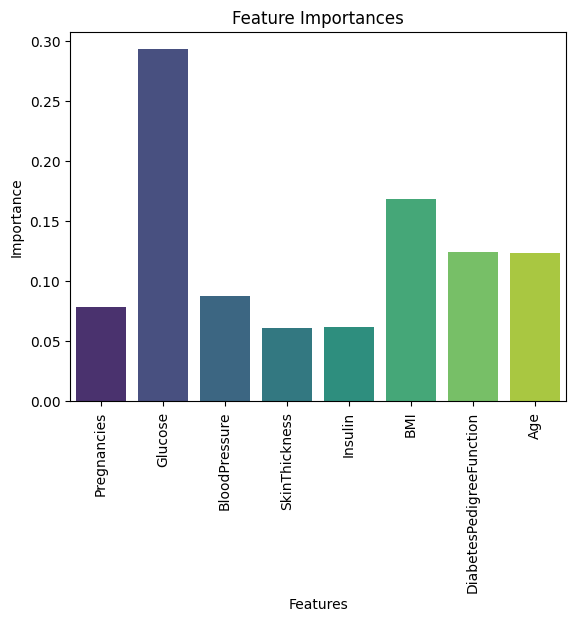

In [43]:
ax = sns.barplot(x=list(features), y=list(feat_imp), palette='viridis')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances')
ax.tick_params(axis='x', rotation=90)
plt.show()

In [44]:
## YOUR CODE HERE
imp_df2 = pd.DataFrame({'Features': features, 'Weights': feat_imp})
imp_sorted2 = imp_df2.sort_values(by = ['Weights'], ascending = False)
imp_sorted2


,Features,Weights
1,Glucose,0.292768
5,BMI,0.168607
6,DiabetesPedigreeFunction,0.124303
7,Age,0.123728
2,BloodPressure,0.088036
0,Pregnancies,0.078773
4,Insulin,0.062336
3,SkinThickness,0.061447


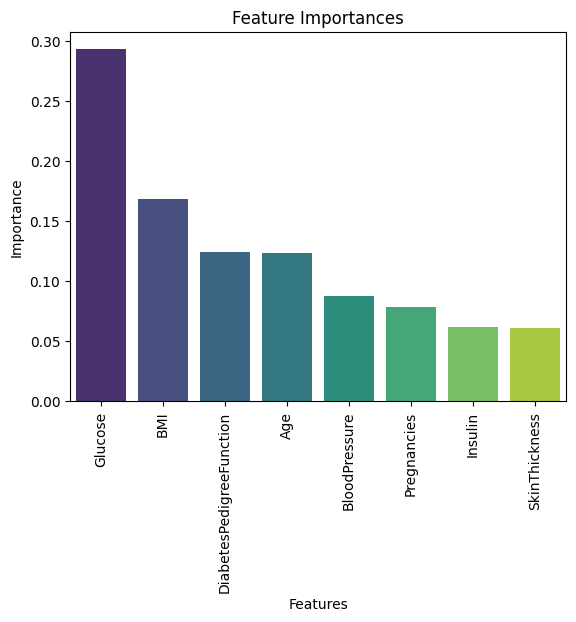

In [45]:
ax = sns.barplot(x='Features', y='Weights', data=imp_sorted2, palette='viridis')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances')
ax.tick_params(axis='x', rotation=90)
plt.show()

- Here the top 2 features remain the same whereas the 3rd important feature is changed. This is can be justified that DiabetesPeigreeFinction is directly correlated to the diabetes outcome.
- If we talk about the feature set which makes more sense, the one obtained in randomforest makes mre sense as it is a more generalized model than a single decidsion tree.

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. For each hyperparmeter, give it 3 potential values. Report on the time taken to do model selection for the model. Also, report the performance of the test dataset from the optimal models.**

In [47]:
import time

In [49]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline

learning_rate = [0.01, 0.1, 0.2]
max_iter = [50, 100, 200]
max_depth = [2, 3, 6]

hgb = HistGradientBoostingClassifier(random_state=42)

pipe = make_pipeline(GridSearchCV( hgb, param_grid={ 'learning_rate': learning_rate,
                                                    'max_iter': max_iter, 'max_depth': max_depth}, cv=5, n_jobs=-1 ))

start_time = time.time()
pipe.fit(X_train, y_train)
end_time = time.time()
print("Time taken for model selection: {:.2f} seconds".format(end_time - start_time))

grid_search_results = pipe.named_steps['gridsearchcv']
best_params = grid_search_results.best_params_
best_score = grid_search_results.best_score_

test_score = pipe.score(X_test, y_test)

print("Best train score:", best_score)
print("Best parameters:", best_params)
print("Test score:", test_score)


Time taken for model selection: 25.29 seconds
Best train score: 0.7671731307477009
Best parameters: {'learning_rate': 0.01, 'max_depth': 2, 'max_iter': 200}
Test score: 0.7207792207792207


**3.2: Train an XGBoost model by tuning 3 hyperparameters using 10 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [50]:
## YOUR CODE HERE
import xgboost as xgb

params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 6]
}

xgb_model = xgb.XGBClassifier(random_state=42)

pipe_xgb = make_pipeline(GridSearchCV(
    xgb_model,
    param_grid=params,
    cv=10,
    n_jobs=-1
))

start_time = time.time()
pipe_xgb.fit(X_train, y_train)
end_time = time.time()
print("Time taken for model selection: {:.2f} seconds".format(end_time - start_time))

grid_search_results_xgb = pipe_xgb.named_steps['gridsearchcv']
best_params_xgb = grid_search_results_xgb.best_params_
best_score_xgb = grid_search_results_xgb.best_score_

y_pred_xgb = pipe_xgb.predict(X_test)
test_score_xgb = accuracy_score(y_test, y_pred_xgb)

print("Best train score:", best_score_xgb)
print("Best parameters:", best_params_xgb)
print("Test score:", test_score_xgb)

Time taken for model selection: 23.64 seconds
Best train score: 0.7669751454257007
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Test score: 0.7467532467532467


**3.3: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

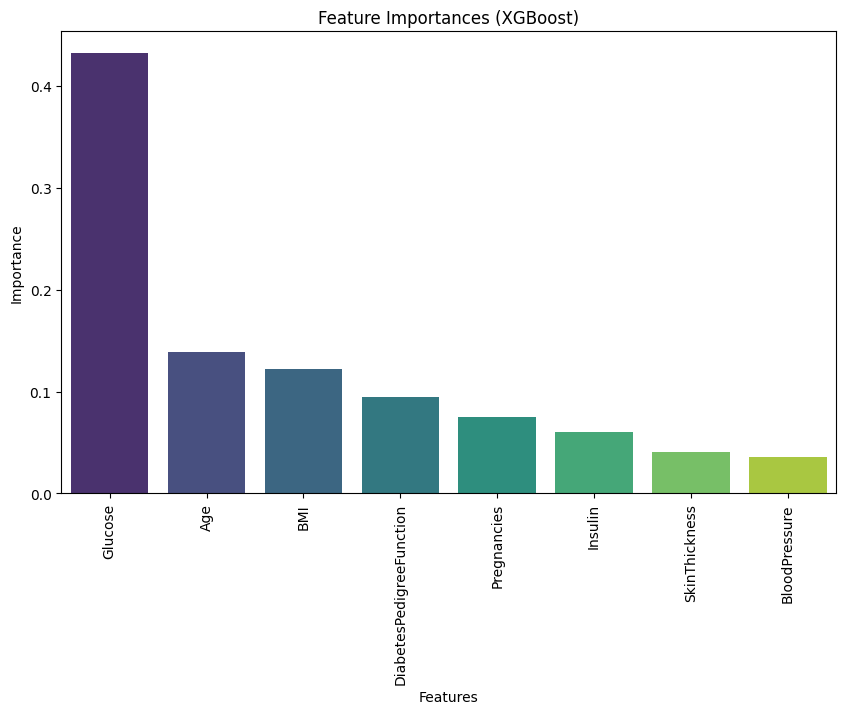

Top 3 features from XGBoost model: ['Glucose', 'Age', 'BMI']


In [55]:
## YOUR CODE HERE
xgb_model = pipe_xgb.named_steps['gridsearchcv'].best_estimator_
feat_imp = xgb_model.feature_importances_

# Create a DataFrame to store feature names and their importances
imp_df = pd.DataFrame({'Features': features, 'Weights': feat_imp})

# Sort the DataFrame based on feature importances
imp_sorted = imp_df.sort_values(by='Weights', ascending=False)

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Features', y='Weights', data=imp_sorted, palette='viridis')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances (XGBoost)')
ax.tick_params(axis='x', rotation=90)
plt.show()

top_feat_indices = feat_imp.argsort()[-3:][::-1]
top_features = [features[i] for i in top_feat_indices]

print("Top 3 features from XGBoost model:", top_features)

 **3.4 Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [56]:
## YOUR CODE HERE
top_feat_indices = feat_imp.argsort()[-7:][::-1]
top_features = [features[i] for i in top_feat_indices]

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

xgb_model_top = xgb.XGBClassifier(random_state=42)
pipe_xgb_top = make_pipeline(GridSearchCV(
    xgb_model_top,
    param_grid=params,
    cv=10,
    n_jobs=-1
))
start_time = time.time()
pipe_xgb_top.fit(X_train_top, y_train)
end_time = time.time()
print("Time taken for model selection with top 7 features: {:.2f} seconds".format(end_time - start_time))

test_score_xgb_top = pipe_xgb_top.score(X_test_top, y_test)

print("Test score with top 7 features:", test_score_xgb_top)

Time taken for model selection with top 7 features: 19.38 seconds
Test score with top 7 features: 0.7402597402597403


- No for me the performance isn't better than firts one because here essentially we are dropping one feature which has +ve correlation with the model.
- This in return reduces the test accuracy.